In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

In [3]:
print("--- Data Summary ---")
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Display the size of the dataset
print(f"Dataset size: {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display key information about the variables
print("Key variable information:")
print(df.info())
print("\n")

# Display descriptive statistics for numerical variables
print("Descriptive statistics for numerical variables:")
print(df.describe())
print("\n")

--- Data Summary ---
First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Dataset size: 1338 rows and 7 columns.

Key variable information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
m

In [4]:
print("--- Objective of the Analysis ---")
print("The primary objective of this analysis is to build a linear regression model that predicts an individual's medical insurance charges based on their personal attributes such as age, sex, BMI, number of children, smoking status, and region.")
print("\n")

--- Objective of the Analysis ---
The primary objective of this analysis is to build a linear regression model that predicts an individual's medical insurance charges based on their personal attributes such as age, sex, BMI, number of children, smoking status, and region.




--- Data Preprocessing and EDA ---
Dataset after one-hot encoding categorical variables:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Generating pairplot to visualize variable relationships...


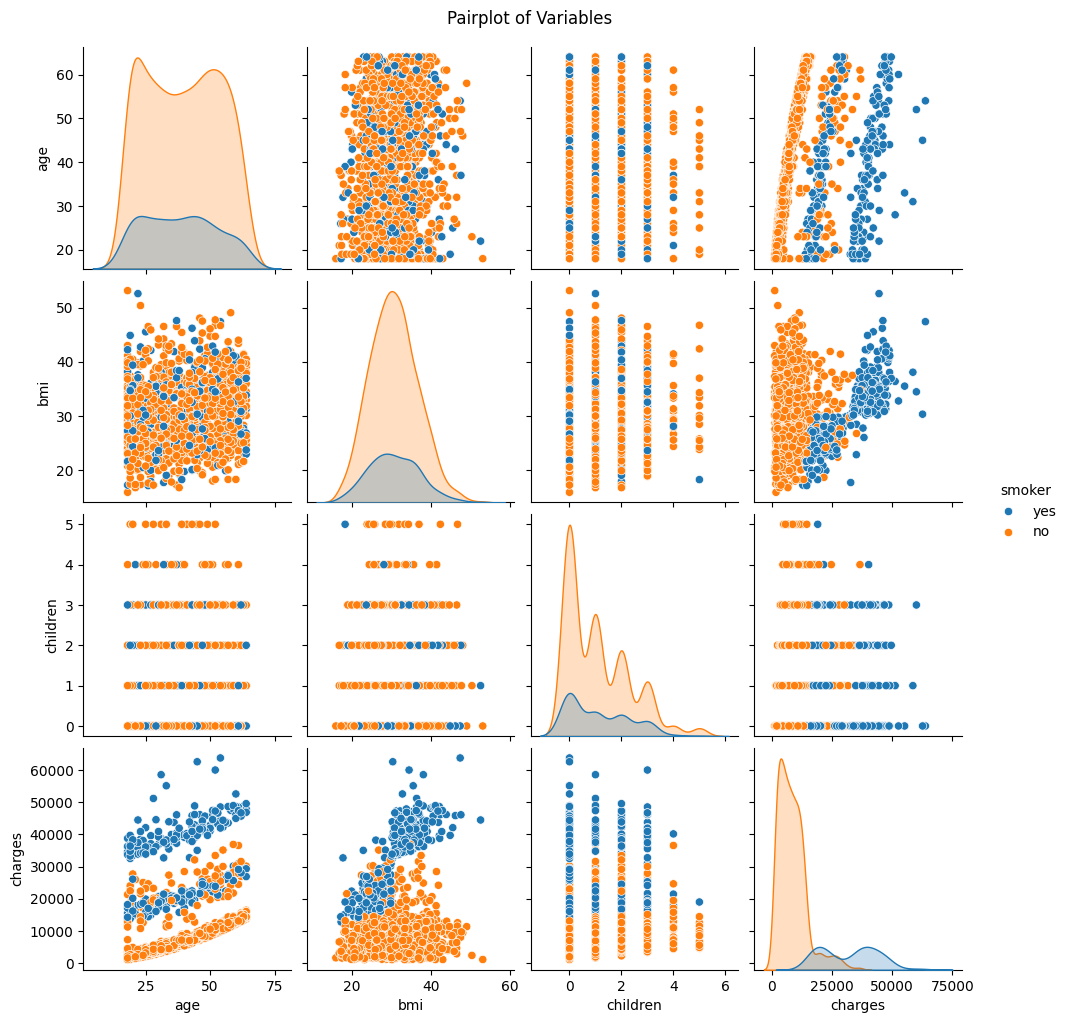

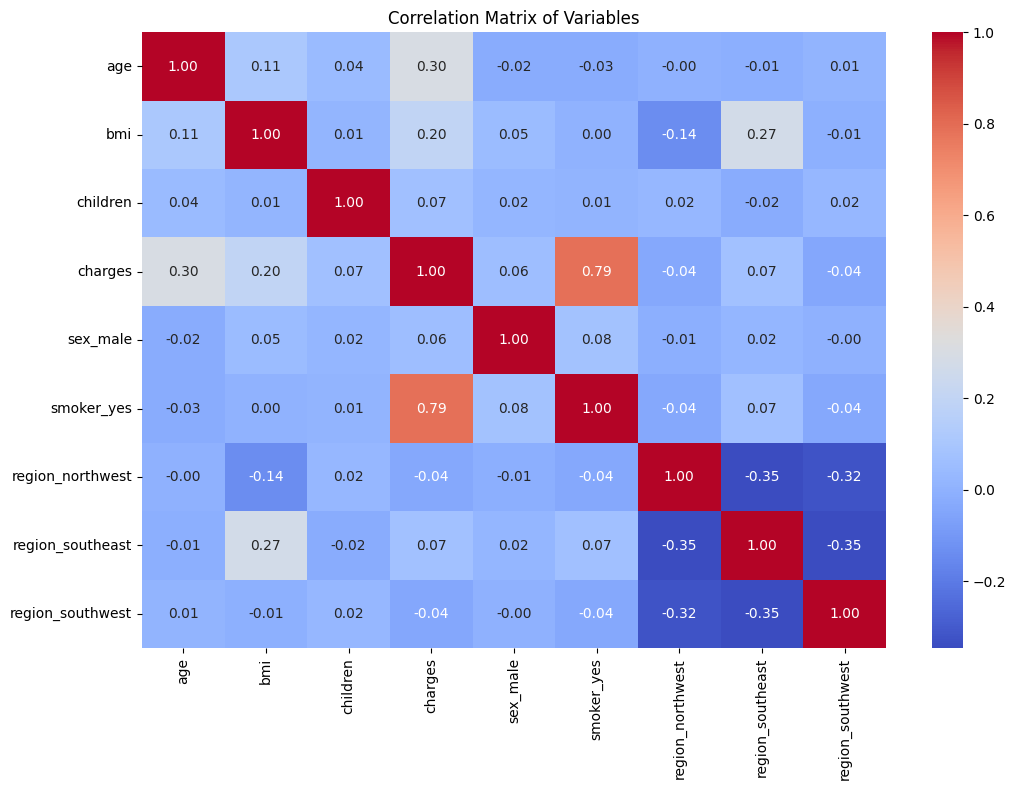

In [5]:
print("--- Data Preprocessing and EDA ---")

# Convert categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Dataset after one-hot encoding categorical variables:")
print(df_encoded.head())
print("\n")

# Visualize the relationships between variables using a pairplot
print("Generating pairplot to visualize variable relationships...")
sns.pairplot(df, hue='smoker')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()
print("\n")

--- Model Comparison ---
--- Model 1: Simple Linear Regression (age vs. charges) ---
R-squared: 0.1241
Root Mean Squared Error: 11661.2160



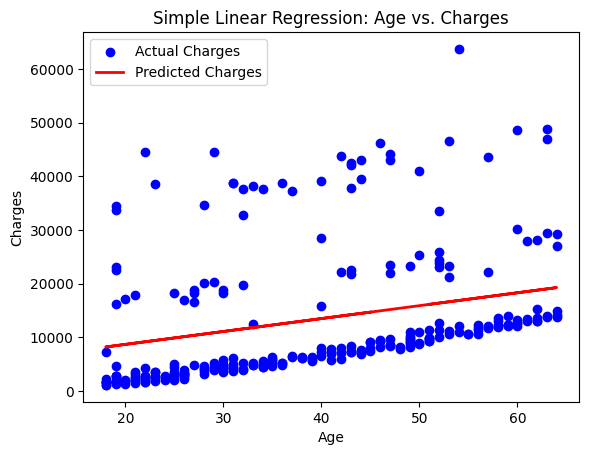

--- Model 2: Multiple Linear Regression (all features) ---
R-squared: 0.7836
Root Mean Squared Error: 5796.2847

--- Model Selection ---
The Multiple Linear Regression model is selected as the best model due to its higher R-squared value.




In [6]:

print("--- Model Comparison ---")

# Define the features (X) and the target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Simple Linear Regression (age vs. charges) ---
print("--- Model 1: Simple Linear Regression (age vs. charges) ---")
X_train_simple = X_train[['age']]
X_test_simple = X_test[['age']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

y_pred_simple = model_simple.predict(X_test_simple)

r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print(f"R-squared: {r2_simple:.4f}")
print(f"Root Mean Squared Error: {rmse_simple:.4f}\n")

# Visualize the simple linear regression model
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Charges')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted Charges')
plt.title('Simple Linear Regression: Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# --- Model 2: Multiple Linear Regression (including all features) ---
print("--- Model 2: Multiple Linear Regression (all features) ---")
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

r2_multiple = r2_score(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print(f"R-squared: {r2_multiple:.4f}")
print(f"Root Mean Squared Error: {rmse_multiple:.4f}\n")


# --- Model Selection ---
print("--- Model Selection ---")
if r2_multiple > r2_simple:
    print("The Multiple Linear Regression model is selected as the best model due to its higher R-squared value.")
else:
    print("The Simple Linear Regression model is selected as the best model.")
print("\n")


--- Key Findings ---
Coefficients of the Multiple Linear Regression Model:
                   Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


Interpretation of Coefficients:
- Age: For each additional year of age, the insurance charge is expected to increase by the coefficient value, holding all other factors constant.
- BMI: For each unit increase in BMI, the insurance charge is expected to increase by the coefficient value.
- Children: The model shows how having an additional child impacts the insurance charges.
- Smoker: Being a smoker has a significant positive impact on insurance charges, as indicated by its large positive coefficient.
- Region: The coefficients for the region variables indicate the difference in charges compared to the baseline region.


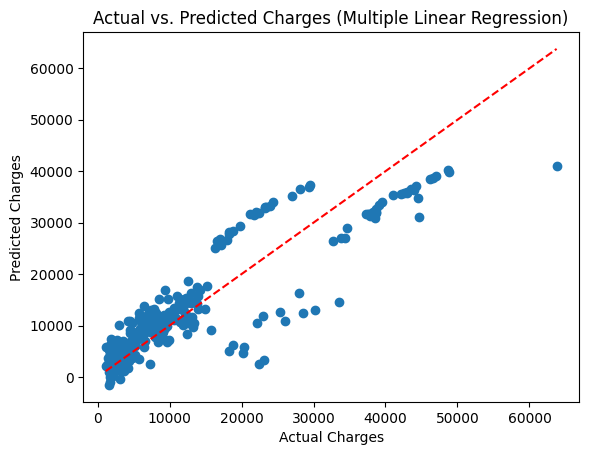

In [7]:
print("--- Key Findings ---")

# Get the coefficients of the best model (Multiple Linear Regression)
coefficients = pd.DataFrame(model_multiple.coef_, X.columns, columns=['Coefficient'])
print("Coefficients of the Multiple Linear Regression Model:")
print(coefficients)
print("\n")

print("Interpretation of Coefficients:")
print("- Age: For each additional year of age, the insurance charge is expected to increase by the coefficient value, holding all other factors constant.")
print("- BMI: For each unit increase in BMI, the insurance charge is expected to increase by the coefficient value.")
print("- Children: The model shows how having an additional child impacts the insurance charges.")
print("- Smoker: Being a smoker has a significant positive impact on insurance charges, as indicated by its large positive coefficient.")
print("- Region: The coefficients for the region variables indicate the difference in charges compared to the baseline region.")

# Visualize predicted vs. actual values for the multiple regression model
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Multiple Linear Regression)")
# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [8]:
print("--- Limitations and Next Steps ---")
print("\nLimitations:")
print("- Linearity Assumption: The model assumes a linear relationship between the predictors and the outcome, which may not always hold true.")
print("- Non-Linear Relationships: The model may not capture more complex, non-linear relationships in the data.")
print("- Feature Engineering: The current model uses the raw features. Creating new features could potentially improve performance.")

print("\nNext Steps:")
print("- Feature Engineering: Explore creating interaction terms (e.g., the interaction between BMI and smoking status).")
print("- Regularization: Try more advanced regression techniques like Ridge or Lasso regression to prevent overfitting and potentially improve the model's generalization.")
print("- Non-Linear Models: Experiment with non-linear models like decision trees or gradient boosting to see if they can capture more complex patterns in the data.")
print("\n--- End of Project ---")

--- Limitations and Next Steps ---

Limitations:
- Linearity Assumption: The model assumes a linear relationship between the predictors and the outcome, which may not always hold true.
- Non-Linear Relationships: The model may not capture more complex, non-linear relationships in the data.
- Feature Engineering: The current model uses the raw features. Creating new features could potentially improve performance.

Next Steps:
- Feature Engineering: Explore creating interaction terms (e.g., the interaction between BMI and smoking status).
- Regularization: Try more advanced regression techniques like Ridge or Lasso regression to prevent overfitting and potentially improve the model's generalization.
- Non-Linear Models: Experiment with non-linear models like decision trees or gradient boosting to see if they can capture more complex patterns in the data.

--- End of Project ---
